In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 设置初始参数
N, K = 1000, 10
samples = 10
p_rew = np.logspace(0, 4, 10)/10000
p_rew

array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00])

In [3]:
# 平均距离与平均集聚系数
C = []
CT = [] # 理论近似值
L = []
for p in p_rew:
    s1 = 0
    s2 = 0
    for i in range(samples):
        G = nx.connected_watts_strogatz_graph(N, K, p)
        s1 += nx.average_clustering(G)
        s2 += nx.average_shortest_path_length(G)

    ct = (3*(K-2)/(4*(K-1)))*((1-p)**3)
    CT.append(ct)
    C.append(s1/samples)
    L.append(s2/samples)


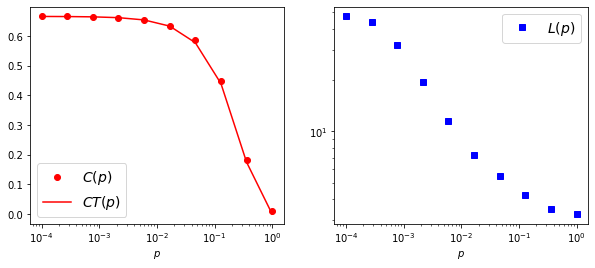

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(p_rew, C, "ro", label="$C(p)$")
plt.plot(p_rew, CT, "r-", label="$CT(p)$")
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")

plt.subplot(122)
plt.plot(p_rew, L, "bs", label="$L(p)$")
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.yscale("log")

plt.savefig("C_L.png", dpi=600)